# NumPy #

In [1]:
# 최신에서는 지정한 것만 사용이 가능함...
# 커널을 restart 하고...
import numpy as np

## 속도 관련 비교 
단, 모든 경우라기 보다는 일반적인 경우에 대해서 이야기를 하는 것임. 주어진 조건 및 상황에 따라서는 달라질 수 있음.

### 속도비교(2개 여러개의 값들을 가지는 자료들의 모든 원소들의 합 - [1,2,3] + [4,5,6] = [5,7,9] ): python의 리스트  vs numpy array

In [8]:
# numpy array vs Python Lsit speed
# 물론 조건 및 여러 상황에 따라서 조금 다를 수 있으니 참고!

# 01) 아래는 두 개의 리스트에서 각기 리스트의 합을 구하는 경우
# ( 코드 상 차이가 발생하는 부분들 : range, 리스트에서 +는 리스트 연결이나, numpy에서는 각기 원소들의 합
# 따라서 동일한 역할을 위해서는 리스트에서는for가 필요함

import time
size_vector = 100000

def pythonlist(size_vector):
    t1 = time.time()
    x = range(size_vector)
    y = range(size_vector)
    t2 = time.time()
    print ("python list Load Time : " + str(t2-t1))
    z = []
    
    t3 = time.time()
    for i in range(len(x)):
        z.append(x[i] + y[i])
    t4 = time.time()
    print ("python list for loop : " + str(t4- t3))
    
    print (" Python List Total :" + str(t4 - t1))

    
def numpyarray1(size_vector):
    t1 = time.time()
    x = np.arange(size_vector)
    y = np.arange(size_vector)
    t2 = time.time()
    print ("numpy array1 Load Time : "+str(t2-t1))
    
    t3 = time.time()
    z = x + y
    t4 = time.time()
    print ("numpy array1 for loop : " + str(t4- t3))

    print (" numpy array1 Total :" + str(t4 - t1))

def numpyarray2(size_vector):
    t1 = time.time()
    x = np.arange(size_vector)
    y = np.arange(size_vector)
    t2 = time.time()
    print ("numpy array2 Load Time : "+str(t2-t1))
    
    t3 = time.time()
    z = np.ndarray(size_vector)
    for i in range(len(x)):
        z[i] = x[i] + y[i]
    t4 = time.time()
    print ("numpy array2 for loop : " + str(t4- t3))
    print (" numpy array2 Total :" + str(t4 - t1))

print (" size_vector : 100000")
pythonlist(size_vector)
numpyarray1(size_vector)
numpyarray2(size_vector)
print ("------------------------------")

print (" size_vector : 100")
size_vector = 100
pythonlist(size_vector)
numpyarray1(size_vector)
numpyarray2(size_vector)
print ("------------------------------")


#  샘플 결과 
# -->기본적으로 일반적인 list로 생성하는 것이 array로 생성하는 것에 비해서 많은 속도가 소욧된다.
# --> numpy의 백터 연산이 기본적인 for에서 append보다 속도가 빠른 것을 볼 수 있음.
# --> 동잉한 for에 대해서도 상당히 속도가 빠른 것을 볼 수 있다. 
# --> 작은 숫자에서는 큰 차이가 없거나 경우에 따라서 List가 빠를 수도 있음.


# 하나의 예시 결과

#  size_vector : 100000
# python list Load Time : 2.86102294921875e-06
# python list for loop : 0.05470418930053711
#  Python List Total :0.05480003356933594
# numpy array1 Load Time : 0.0014030933380126953
# numpy array1 for loop : 0.0006737709045410156
#  numpy array1 Total :0.002165079116821289
# numpy array2 Load Time : 0.00037980079650878906
# numpy array2 for loop : 1.0013580322265625e-05
#  numpy array2 Total :0.0004830360412597656
# ------------------------------
#  size_vector : 100
# python list Load Time : 3.0994415283203125e-06
# python list for loop : 4.7206878662109375e-05
#  Python List Total :0.00010013580322265625
# numpy array1 Load Time : 5.125999450683594e-05
# numpy array1 for loop : 1.621246337890625e-05
#  numpy array1 Total :0.0001232624053955078
# numpy array2 Load Time : 1.2159347534179688e-05
# numpy array2 for loop : 6.9141387939453125e-06
#  numpy array2 Total :6.818771362304688e-05
# ------------------------------


 size_vector : 100000
python list Load Time : 4.0531158447265625e-06
python list for loop : 0.06072592735290527
 Python List Total :0.0610659122467041
numpy array1 Load Time : 0.0010690689086914062
numpy array1 for loop : 0.0013248920440673828
 numpy array1 Total :0.0036630630493164062
numpy array2 Load Time : 0.00045108795166015625
numpy array2 for loop : 0.06673502922058105
 numpy array2 Total :0.06725215911865234
------------------------------
 size_vector : 100
python list Load Time : 2.6226043701171875e-06
python list for loop : 4.482269287109375e-05
 Python List Total :9.679794311523438e-05
numpy array1 Load Time : 3.0994415283203125e-05
numpy array1 for loop : 1.3113021850585938e-05
 numpy array1 Total :9.202957153320312e-05
numpy array2 Load Time : 1.6927719116210938e-05
numpy array2 for loop : 8.511543273925781e-05
 numpy array2 Total :0.0011699199676513672
------------------------------


### 속도 비교 : 각기 원소들의 제곱들로 만드는 것.

In [16]:
# 02) 속도 비교
# 제곱 결과들

def square_list0(N):
    squares = []
    for n in range(N):
        squares = squares + [n**2]
    return squares


def square_list1(N):
    squares = []
    for n in range(N):
        # 일반적으로 생성해서 더하는 방법
        squares += [n**2]
    return squares
    

def square_list2(N):
    squares = []
    for n in range(N):
        # append 라고 이미 정의된 메소드 이용하는 방법
        squares.append(n**2)
    return squares
    

def square_list3(N):
    # 동일한 방법이나 벡터연산으로 처리
    return [n**2 for n in range(N)]
    

def square_array(N):
    # Vectorize the entire operation.
    #from numpy import arange
    #return arange(N)**2
    return np.arange(N)**2


n = 100
print("Number :" ,n)
t1 = time.time()
square_list0(n)
t2 = time.time()
print ("List0-Try : ",t2-t1)

t1 = time.time()
square_list1(n)
t2 = time.time()
print ("List1-Try : ",t2-t1)

t1 = time.time()
square_list2(n)
t2 = time.time()
print ("List2-Try : ",t2-t1)

t1 = time.time()
square_list3(n)
t2 = time.time()
print ("List3-Try : ",t2-t1)

t1 = time.time()
square_array(n)
t2 = time.time()
print ("Array-Try : ",t2-t1)
print ("---------------")

n = 100000
print("Number :", n)
t1 = time.time()
square_list0(n)
t2 = time.time()
print ("List0-Try : ",t2-t1)

t1 = time.time()
square_list1(n)
t2 = time.time()
print ("List1-Try : ",t2-t1)

t1 = time.time()
square_list2(n)
t2 = time.time()
print ("List2-Try : ",t2-t1)

t1 = time.time()
square_list3(n)
t2 = time.time()
print ("List3-Try : ",t2-t1)

t1 = time.time()
square_array(n)
t2 = time.time()
print ("Array-Try : ",t2-t1)



# 결과 
# ---> 리스트를 사용할 것이라면 그래도 내부적으로 정의된 append가 빠르며
# ---> 리스트를 사용할 때 이보다더 더 빠르게 사용하려면 "벡터연산"으로 코드를 변경할 것
# ---> 이보다도 numpy가 더 빠르다. 특히 n이 작으면 차이가 별로 없으나, 커질수록 많이 차이가 남!!!

# ------------------------------------------------------------
# Number : 100
# List0-Try :  0.00013494491577148438
# List1-Try :  9.608268737792969e-05
# List2-Try :  9.298324584960938e-05
# List3-Try :  8.702278137207031e-05
# Array-Try :  0.00011014938354492188
# ---------------
# Number : 100000
# List0-Try :  33.61902904510498
# List1-Try :  0.049868106842041016
# List2-Try :  0.04886770248413086
# List3-Try :  0.03975033760070801
# Array-Try :  0.0006237030029296875



Number : 100
List0-Try :  0.00029587745666503906
List1-Try :  0.00024819374084472656
List2-Try :  0.0002777576446533203
List3-Try :  0.0002219676971435547
Array-Try :  0.00020599365234375
---------------
Number : 100000
List0-Try :  35.72686004638672
List1-Try :  0.04867196083068848
List2-Try :  0.04655885696411133
List3-Try :  0.038839101791381836
Array-Try :  0.0008132457733154297


## 참고) numpy 이미지에 활용!!!

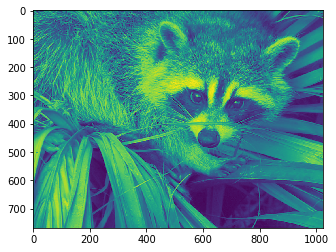

In [99]:
#### NumPy Exercise ####
%matplotlib inline
from scipy import ndimage
from scipy import misc
face = misc.face(gray=True)  
import pylab as plt
face = misc.face(gray=True)
plt.imshow(face)  

In [100]:
print (face.shape)
print (face.dtype)

(768, 1024)
uint8


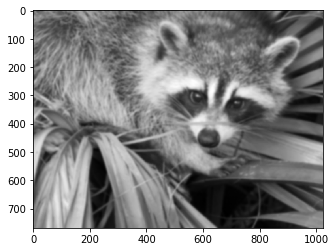

In [101]:
blurred_face = ndimage.gaussian_filter(face, sigma=3)
plt.imshow(blurred_face, cmap=plt.cm.gray)

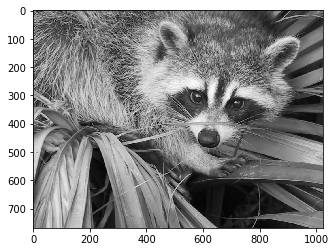

In [102]:
plt.imshow(face, cmap=plt.cm.gray)

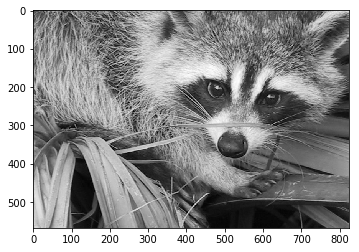

In [103]:
crop_face = face[100:-100, 100:-100]
plt.imshow(crop_face, cmap=plt.cm.gray)

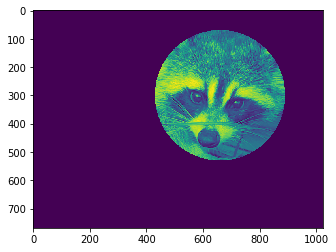

In [104]:
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx] # x and y indices of pixels
y.shape, x.shape

centerx, centery = (660, 300) # center of the image
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2
face[mask] = 0
plt.imshow(face) 